In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import quaternion
# from quaternion import *
# from scipy.spatial.transform import Rotation as R

In [3]:
def plot(*V):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.axis([-2, 2, -2, 2])
    ax.grid()
    theta = np.linspace(0, np.pi*2, 129)
    vec = np.exp(1j * theta)
    ax.plot(vec.real, vec.imag, lw=0.5, color='gray', alpha=0.6)
    
    for v in V:
        ax.scatter(v.real, v.imag)
        ax.plot([0, v.real], [0, v.imag])
        ax.text(v.real, v.imag, s="{:.2f}".format(v), fontsize=9)    

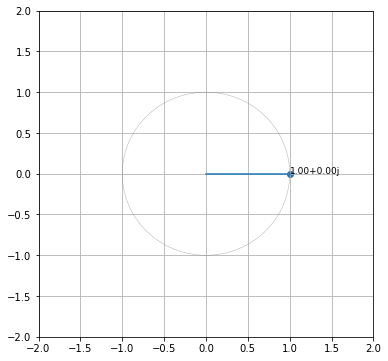

In [4]:
r = 1
t = 0
v = r * np.exp(1j * t)
plot(v)

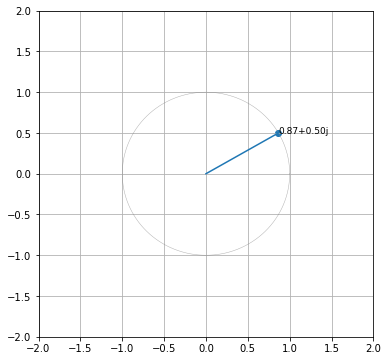

In [5]:
v1 = np.exp(1j * np.deg2rad(30))
v2 = np.exp(1j * np.deg2rad(60))
plot(v1)

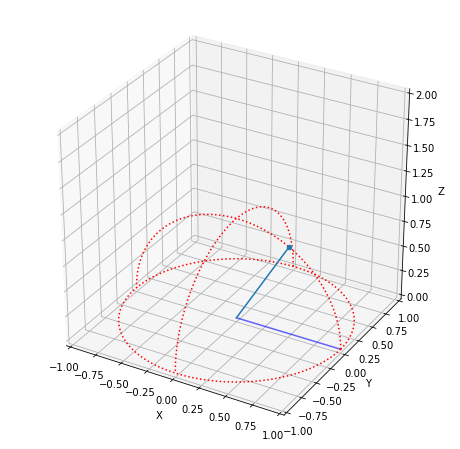

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
g = 1
ax.set_xlim(-g, g)
ax.set_ylim(-g, g)
ax.set_zlim(0, 2*g)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

v0 = np.array([0, 0, 0])
v1 = np.array([1, 0, 0])

X = [v0[0], v1[0]]
Y = [v0[1], v1[1]]
Z = [v0[2], v1[2]] 
ax.plot(X, Y, Z, color='blue', alpha=0.6)

t = np.linspace(0, 2*np.pi, 64*2+1)
CX = np.cos(t)
CY = np.sin(t)
ax.plot(CX, CY, [0]*len(t), linestyle=':', c='r')
t2 = np.linspace(0, np.pi, 64+1)
ax.plot(np.cos(t2), [0]*len(t2), np.sin(t2), linestyle=':', c='r')
ax.plot([0]*len(t2), np.cos(t2), np.sin(t2), linestyle=':', c='r')

def rodrigues(r, n, t):
    return r * np.cos(t) + (1 - np.cos(t)) * (r * n) * n + np.cross(n, r) * np.sin(t)

v = np.array([0, 0, 1])
n = np.array([0, 1, 0])
r = rodrigues(v, n, np.deg2rad(30))
ax.plot([0, r[0]], [0, r[1]], [0, r[2]])
ax.scatter(r[0], r[1], r[2])

In [7]:
def QxQ(q1, q2):# q = [w, x, y ,z]
    w = q1[0]*q2[0] - q1[1]*q2[1] - q1[2]*q2[2] - q1[3]*q2[3]
    i = q1[0]*q2[1] + q1[1]*q2[0] + q1[2]*q2[3] - q1[3]*q2[2]
    j = q1[0]*q2[2] - q1[1]*q2[3] + q1[2]*q2[0] + q1[3]*q2[1]
    k = q1[0]*q2[3] + q1[1]*q2[2] - q1[2]*q2[1] + q1[3]*q2[0]
    return [w, i, j, k]

def QxQ2(q1, q2):
    v1 = np.array(q1[1:])
    v2 = np.array(q2[1:])
    w = q1[0] * q2[0] - np.dot(v1, v2)
    i, j, k = q1[0] * v2 + q2[0] * v1 + np.cross(v1, v2)
    return [w, i, j, k]

def qpq(P, A, t):
    p = np.array(P[1:])
    a = np.array(A)
    return p*np.cos(t) + np.cross(p, a)*np.sin(t) + a*(a*p)*(1-np.cos(t))

def QPQ(P, n, t):
    q =  [np.cos(t/2),  n[0] * np.sin(t/2),  n[1] * np.sin(t/2),  n[2] * np.sin(t/2)]
    qc = [np.cos(t/2), -n[0] * np.sin(t/2), -n[1] * np.sin(t/2), -n[2] * np.sin(t/2)]
    qp = QxQ(q, P)
    qpq = QxQ(qp, qc)
    return qpq

In [8]:
from ipywidgets import interact

@interact(ELE=(0, 100, 1), AZM=(0, 100, 1), PZ=(0, 5, 0.1), VZ=(0, 5, 0.1), theta=(0, np.pi*2, 0.2))
def Quat(ELE, AZM, PZ, VZ, theta=0):
    P = [0, 1, -1, PZ] # w, x, y, z
    P /= sum(np.array(P)**2)**0.5 
    V = [1, 0, VZ]
    V /= sum(np.array(V)**2)**0.5 
    #print(V)
    [w, x, y, z] = QPQ(P, V, theta)
    
    # plot
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=ELE, azim=AZM)
    g = 1
    ax.set_xlim(-g, g)
    ax.set_ylim(-g, g)
    ax.set_zlim(0, g*2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    

    t = np.linspace(0, 2*np.pi, 64*2+1)
    C = [QPQ(P, V, t[i]) for i in range(len(t))]
    [cw, cx, cy, cz]  = np.array(C).T
    t2 = np.linspace(0, np.pi, 64+1)
    
    cr = np.linalg.norm(np.cross(P[1:], V))
    h = (1 - cr**2)**0.5
    V2 = V* h
    ax.plot(np.cos(t), np.sin(t), [0]*len(t), linestyle=':', c='red')
    ax.plot(np.cos(t2), [0]*len(t2), np.sin(t2), linestyle=':', c='red')
    ax.plot([0]*len(t2), np.cos(t2), np.sin(t2), linestyle=':', c='red')
    ax.plot([0, x], [0, y], [0, z], color='green')
    ax.plot([0, x, x], [0, y, y], [0, 0, z], linestyle='--', c='green', lw=1)
    ax.scatter(x, y, z, color='green')
    ax.plot([0, V[0]], [0, V[1]], [0, V[2]], linestyle='-', c='red', lw=1)
    ax.plot([0, V[0], V[0]], [0, V[1], V[1]], [0, 0, V[2]], linestyle='--', c='red', lw=1)
    ax.scatter(V[0], V[1], V[2], color='red')
    ax.plot(cx, cy, cz, color='m', lw=1, linestyle='--')
    ax.plot([V2[0], x, V[0]], [V2[1], y, V[1]], [V2[2], z, V[2]], color='blue', lw=1, linestyle=':')

interactive(children=(IntSlider(value=50, description='ELE'), IntSlider(value=50, description='AZM'), FloatSli…